In [29]:
import tensorflow as tf

In [30]:
import matplotlib.pyplot as plt
from keras.models import Sequential

In [31]:
from tensorflow.keras import models, layers

In [32]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=25

In [33]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 16065 files belonging to 10 classes.


In [34]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

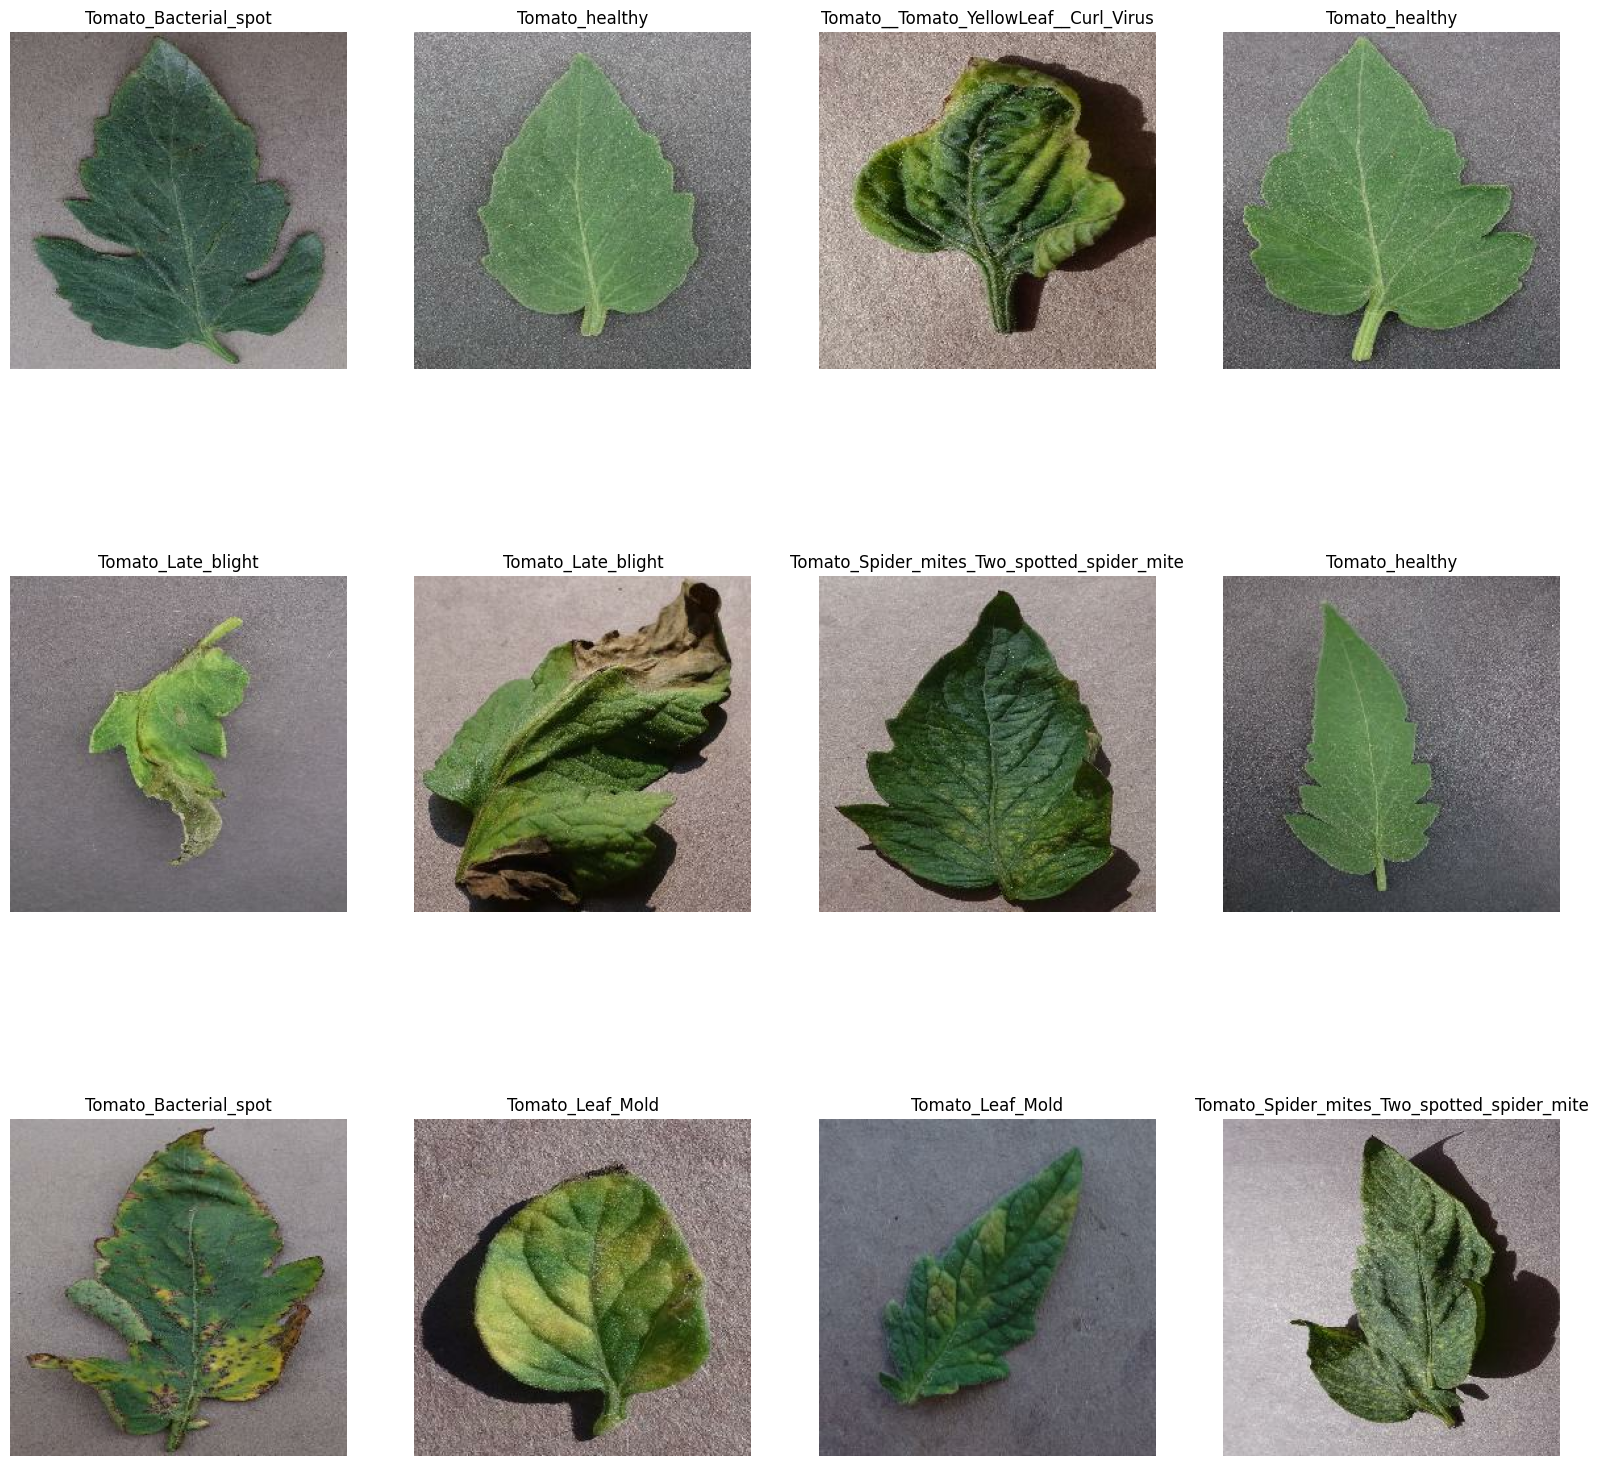

In [35]:
plt.figure(figsize=(20, 20))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [36]:
len(dataset)

503

In [37]:
train_size = 0.8
len(dataset)*train_size

402.40000000000003

In [38]:
train_ds = dataset.take(400)
len(train_ds)

400

In [39]:
test_ds = dataset.skip(400)
len(test_ds)

103

In [40]:
val_size=0.1
len(dataset)*val_size

50.300000000000004

In [41]:
val_ds = test_ds.take(50)
len(val_ds)

50

In [42]:
test_ds = test_ds.skip(50)
len(test_ds)

53

In [43]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [44]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [45]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [46]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dense(len(class_names))
])

In [47]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [48]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs = EPOCHS,
    verbose = 1,
    batch_size=BATCH_SIZE
)

Epoch 1/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 470s 1s/step - accuracy: 0.4395 - loss: 1.7832 - val_accuracy: 0.6550 - val_loss: 1.0774
Epoch 2/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 500s 1s/step - accuracy: 0.7830 - loss: 0.6036 - val_accuracy: 0.7987 - val_loss: 0.5877
Epoch 3/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 458s 1s/step - accuracy: 0.8500 - loss: 0.4311 - val_accuracy: 0.8281 - val_loss: 0.4938
Epoch 4/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - accuracy: 0.8806 - loss: 0.3398 - val_accuracy: 0.8350 - val_loss: 0.5335
Epoch 5/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 531s 1s/step - accuracy: 0.8979 - loss: 0.3025 - val_accuracy: 0.8800 - val_loss: 0.3965
Epoch 6/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 531s 1s/step - accuracy: 0.9087 - loss: 0.2568 - val_accuracy: 0.8806 - val_loss: 0.4434
Epoch 7/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 507s 1s/step - accuracy: 0.9145 - loss: 0.2472 - val_accuracy: 0.8119 - val_loss: 0.7841
Epoch 8/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 510s 1s/step - accuracy: 0.9324 - loss: 0.1981 - val_accu

In [49]:
scores = model.evaluate(test_ds)

53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - accuracy: 0.9305 - loss: 0.2291


In [50]:
history

In [51]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [52]:
history.history['accuracy']

[0.598437488079071,
 0.8007031083106995,
 0.8567187786102295,
 0.8856250047683716,
 0.897265613079071,
 0.9139843583106995,
 0.9188281297683716,
 0.9345312714576721,
 0.9314062595367432,
 0.9362499713897705,
 0.9466406106948853,
 0.9496874809265137,
 0.9481250047683716,
 0.9596874713897705,
 0.9573437571525574,
 0.9532031416893005,
 0.965624988079071,
 0.958203136920929,
 0.9642968773841858,
 0.9643750190734863,
 0.9643750190734863,
 0.9685156345367432,
 0.9755468964576721,
 0.9674218893051147,
 0.9713281393051147]

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

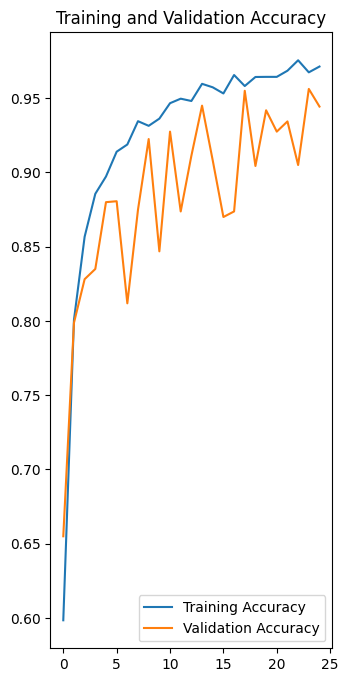

In [54]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [55]:
import numpy as np
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    return predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


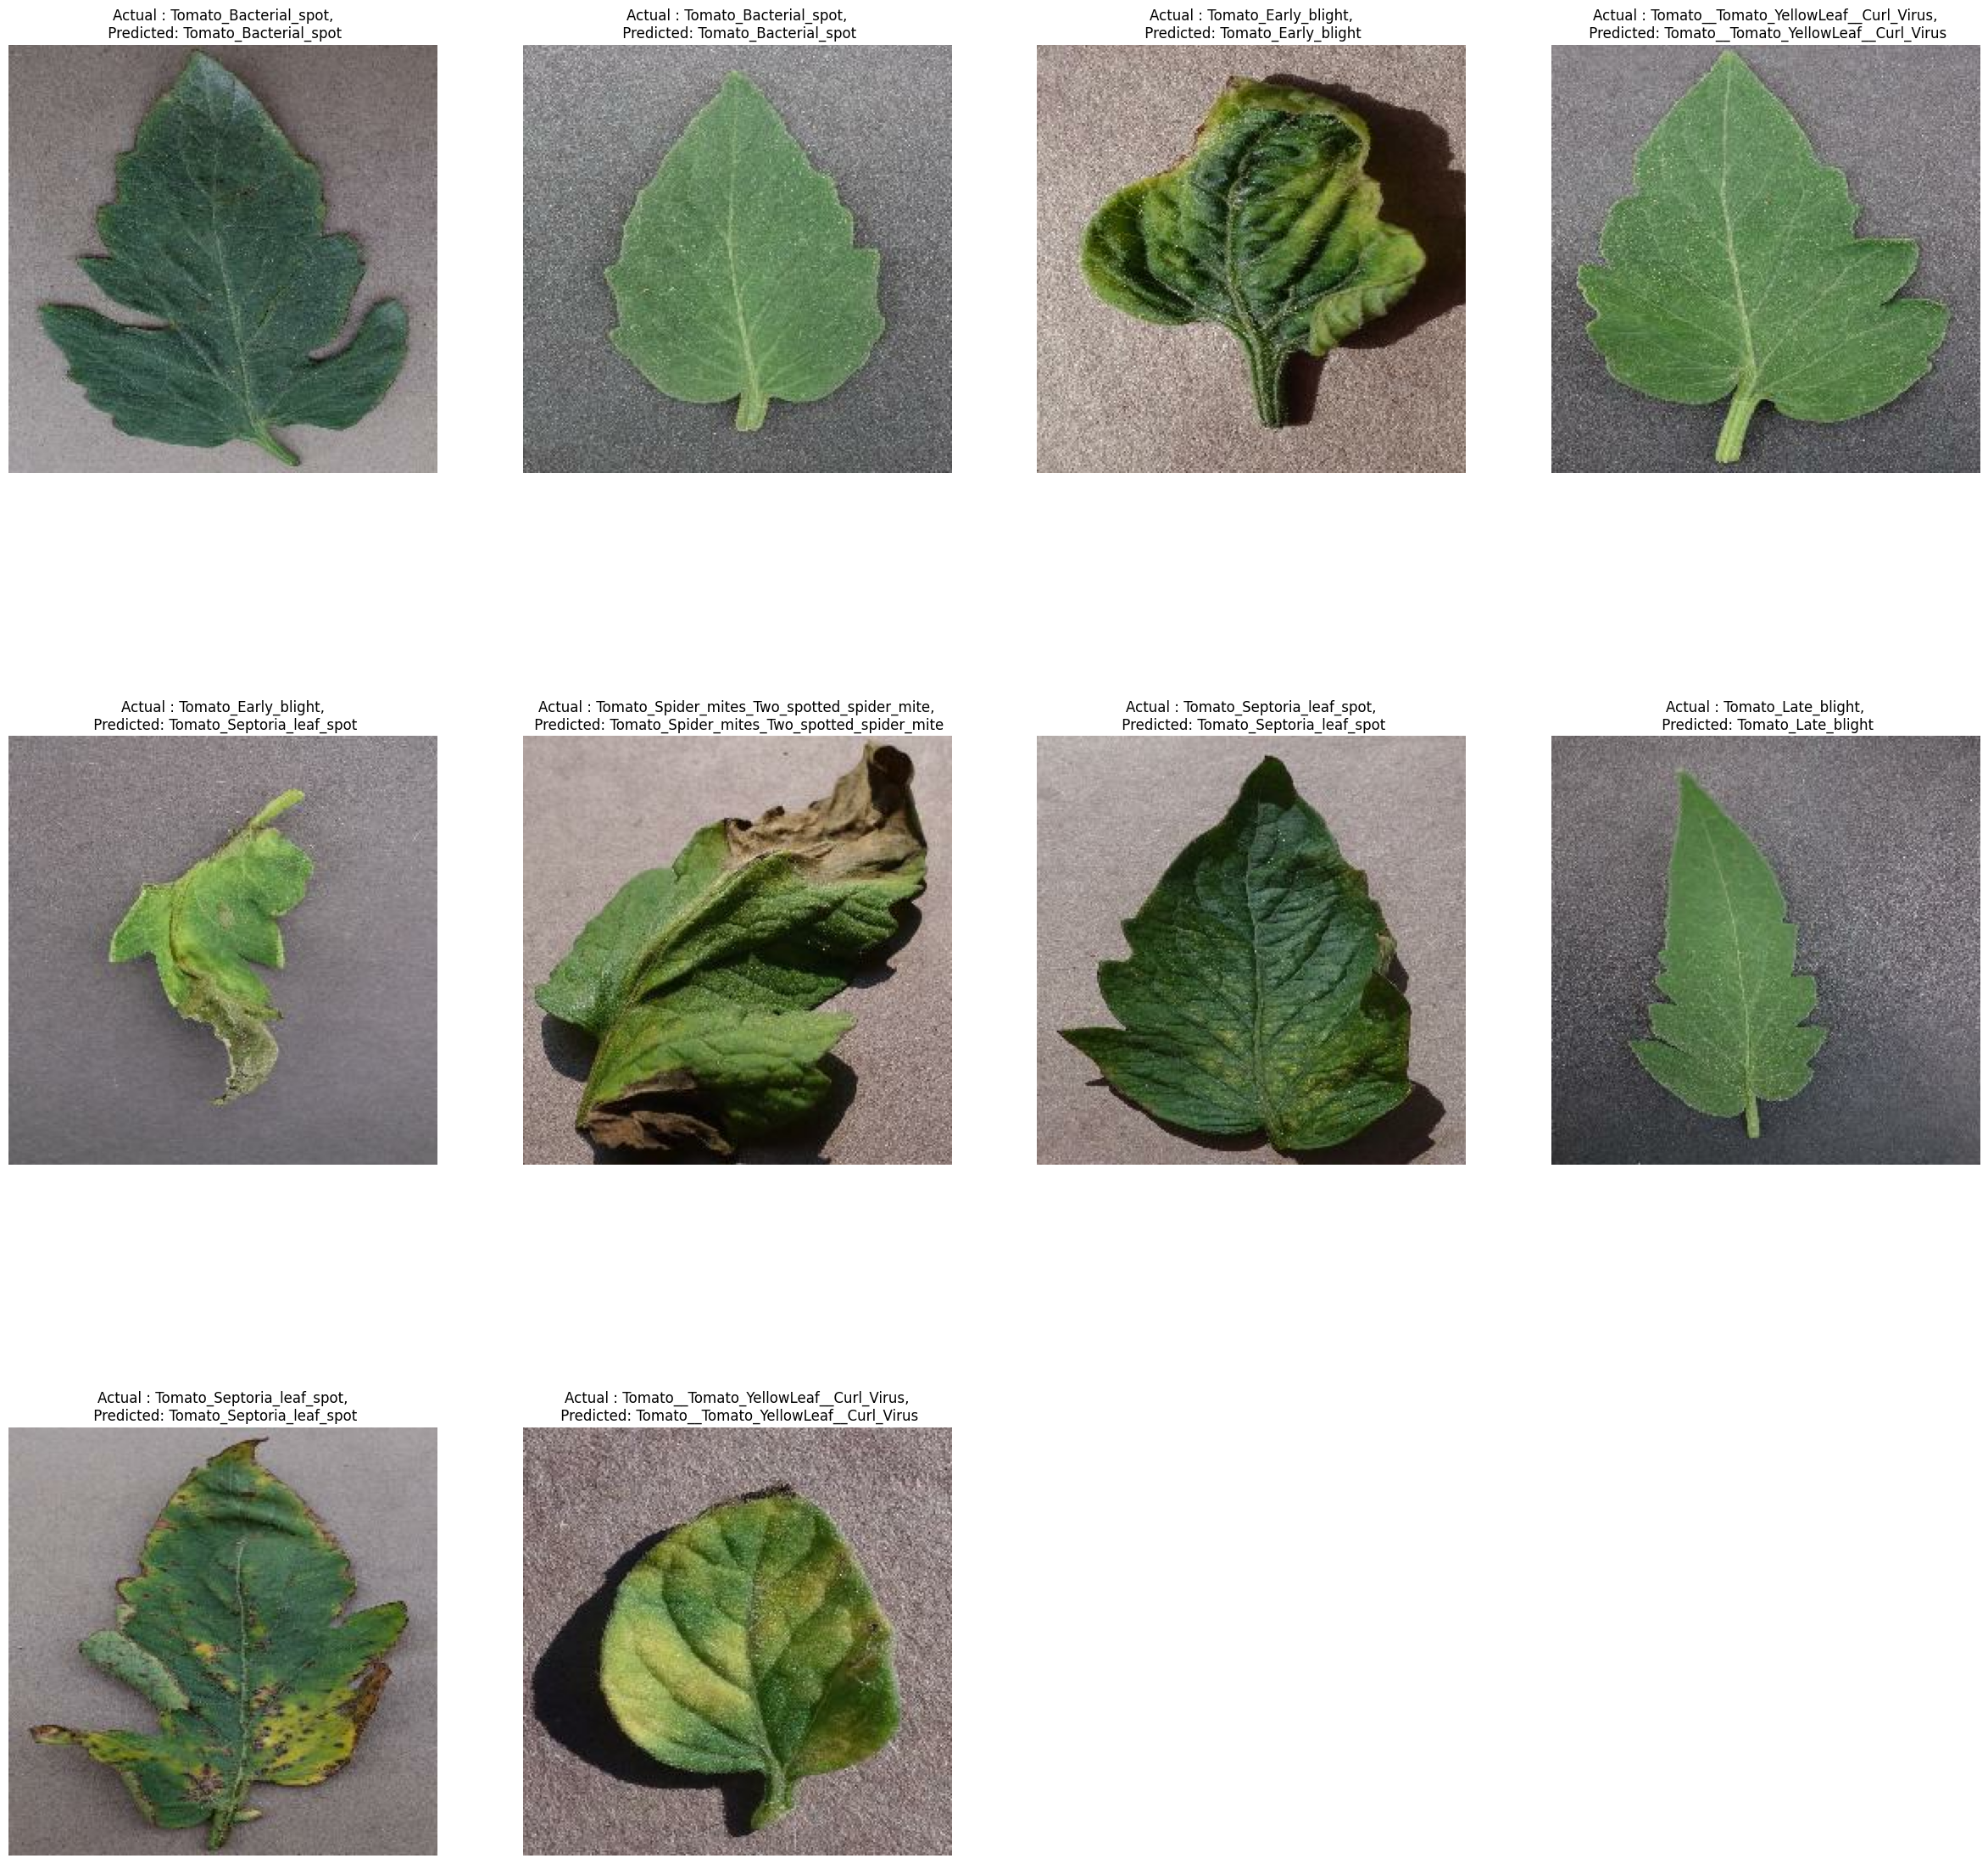

In [56]:
plt.figure(figsize = (30,30))
for images,labels in test_ds.take(1):
    for i in range(10):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        
        predicted_class = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual : {actual_class},\n Predicted: {predicted_class}")
        
        plt.axis("off")